In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
N = 1000

x = np.linspace(0, 10, N)

y = 4.53098 + 3.91034*x + np.random.randn(N)

X = np.vstack((np.array([1]*N), x)).T

print(X[:10,:])
print(y[:10])

[[1.         0.        ]
 [1.         0.01001001]
 [1.         0.02002002]
 [1.         0.03003003]
 [1.         0.04004004]
 [1.         0.05005005]
 [1.         0.06006006]
 [1.         0.07007007]
 [1.         0.08008008]
 [1.         0.09009009]]
[4.91748978 4.88535685 3.35172813 4.15249432 4.95459867 4.30480125
 6.26240697 5.25524648 4.88032307 4.87785082]


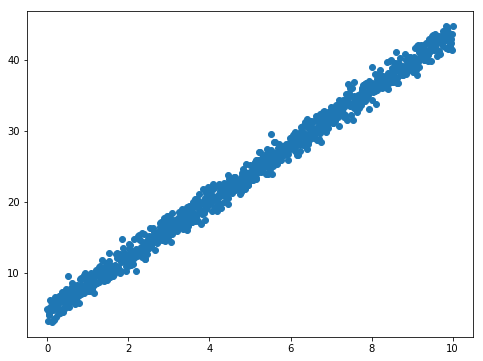

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,1], y)

In [15]:
N = X.shape[0]                 # In R: N <- nrow(X)

np.random.seed(101)            # In R: seed(101)

idx = np.random.permutation(N) # In R: idx <- sample(1:N)
X = X[idx,:]                   # In R: X = X[idx,]
y = y[idx]                     # In R: y = y[idx]

X_train = X[:int(0.6*N),:]
y_train = y[:int(0.6*N)]

X_cv = X[int(0.6*N):int(0.8*N),:]
y_cv = y[int(0.6*N):int(0.8*N)]

X_test = X[int(0.8*N):,:]
y_test = y[int(0.8*N):]

In [39]:
y_train[2:10] += 30

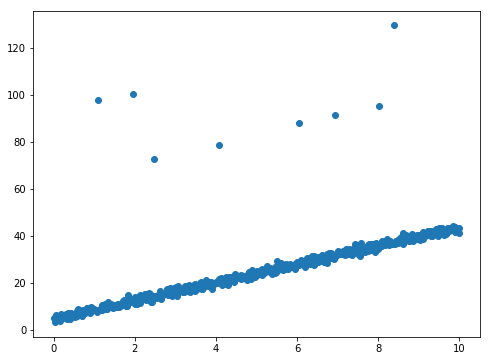

In [40]:
plt.figure(figsize = (8,6))
plt.scatter(X_train[:,1], y_train)

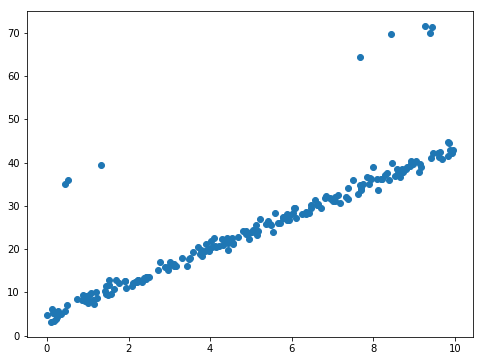

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(X_cv[:,1], y_cv)

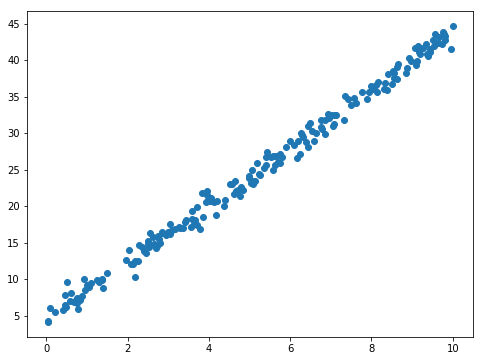

In [42]:
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,1], y_test)

In [43]:
def OLS(y, y_hat):
    return (y - y_hat).dot(y - y_hat)

In [44]:
w_0 = np.random.randn(X.shape[1])

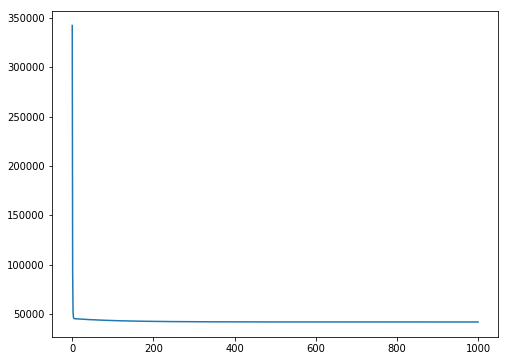

In [45]:
w = w_0.copy()

J = []
eta = 3e-5
epochs = int(1e3)

check_point = 10

for t in range(epochs):
    y_hat_train = X_train.dot(w)
    J.append(OLS(y_train, y_hat_train))
    w -= eta*(X_train.T.dot(y_hat_train - y_train))
    
    #if t % check_point == 0:
    #    w.savetxt("w_checkpoint.csv")
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [46]:
N_train = X_train.shape[0]
N_cv = X_cv.shape[0]

J_train = (1/N_train)*OLS(y_train, y_hat_train)

y_hat_cv = X_cv.dot(w)

J_cv = (1/N_cv)*OLS(y_cv, y_hat_cv)

print("Training Error: {}".format(J_train))
print("Validation Error: {}".format(J_cv))

Training Error: 69.57867916645971
Validation Error: 35.76501397705732


In [47]:
cv = []

for lambda2 in range(100):
    w = w_0.copy()
    
    eta = 3e-5
    epochs = int(1e3)
    
    for t in range(epochs):
        y_hat_train = X_train.dot(w)
        w -= eta*(X_train.T.dot(y_hat_train - y_train) + lambda2*w)
        
    y_hat_cv = X_cv.dot(w)
    
    J_train = (1/N_train)*OLS(y_train, y_hat_train)
    J_cv = (1/N_cv)*OLS(y_cv, y_hat_cv)
    
    cv.append((J_train, J_cv, lambda2))

In [51]:
for i in cv[:10]:
    print(i)

(69.57867916645971, 35.76501397705732, 0)
(69.57980385109921, 35.75648542348346, 1)
(69.58141498632098, 35.74855631273501, 2)
(69.58349549355073, 35.74120787991416, 3)
(69.58602885294557, 35.73442194826456, 4)
(69.58899908452958, 35.7281809097546, 5)
(69.59239072999645, 35.72246770633835, 6)
(69.59618883515519, 35.71726581186937, 7)
(69.60037893299405, 35.71255921464339, 8)
(69.60494702734074, 35.70833240054682, 9)


In [53]:
J_train = [i for i,j,k in cv]
J_cv = [j for i,j,k in cv]
lambda2 = [k for i,j,k in cv]

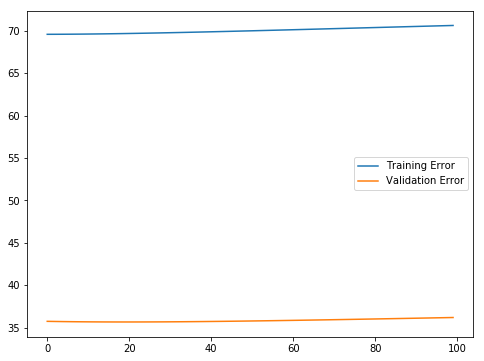

In [54]:
plt.figure(figsize = (8,6))
plt.plot(lambda2, J_train, label = "Training Error")
plt.plot(lambda2, J_cv, label = "Validation Error")
plt.legend()

In [56]:
w = w_0.copy()

eta = 3e-5
epochs = int(1e3)

for t in range(epochs):
    y_hat_train = X_train.dot(w)
    w -= eta*(X_train.T.dot(y_hat_train - y_train) + 0*w)
    
y_hat_test = X_test.dot(w)

N_test = X_test.shape[0]
J_test = (1/N_test)*OLS(y_test, y_hat_test)

print("Test Error: {}".format(J_test))

Test Error: 1.8546339853854992
